In [2]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read in data for happiness over time (1972 - 2016)
gss_happy_path_file = "../data/Happiness1972-2016.csv"
gss_happy_df = pd.read_csv(gss_happy_path_file, encoding="ISO-8859-1")
gss_happy_df.head()

,General happiness,Gss year for this respondent
0,Not too happy,1972
1,Not too happy,1972
2,Pretty happy,1972
3,Not too happy,1972
4,Pretty happy,1972


In [4]:
#read in data for specific timepoint for snapshot analysis
gss_path_file = "../data/GSSData_2006to2016.csv"
gss_df = pd.read_csv(gss_path_file, encoding="ISO-8859-1")
gss_df.head()

,Ballot used for interview,Specific denomination,Rs religious preference,Should marijuana be made legal,Courts dealing with criminals,Importance of gun control issue to r,Caring for the poor -- version z,Halting rising crime rate,Think of self as liberal or conservative,Vote obama or mccain,...,Was r born in this country,"Region of residence, age 16",Type of place lived in when 16 yrs old,Race of respondent,Respondents sex,Type of college respondent attended,College major 1,Mothers highest degree,Rs highest degree,Gss year for this respondent
0,Ballot c,Not applicable,None,Not legal,Not harsh enough,Not applicable,Not applicable,Too much,Extremely liberal,Not applicable,...,No,Foreign,City gt 250000,Black,Female,Not applicable,Not applicable,Junior college,High school,2006
1,Ballot b,Not applicable,Catholic,Not legal,Too harsh,Not applicable,Not applicable,Not applicable,Slightly liberal,Not applicable,...,No,Middle atlantic,City gt 250000,Other,Male,Not applicable,Not applicable,High school,High school,2006
2,Ballot b,Not applicable,Catholic,Not legal,About right,Not applicable,Not applicable,Too much,Conservative,Not applicable,...,No,Middle atlantic,City gt 250000,White,Female,Not applicable,Not applicable,Don't know,Lt high school,2006
3,Ballot a,No denomination,Protestant,Not applicable,About right,Not applicable,Not applicable,Not applicable,Slightly liberal,Not applicable,...,Yes,Middle atlantic,City gt 250000,Black,Female,Not applicable,Not applicable,Graduate,High school,2006
4,Ballot a,Not applicable,Catholic,Not applicable,Too harsh,Not applicable,Not applicable,Not applicable,Liberal,Not applicable,...,Yes,Middle atlantic,City gt 250000,Black,Male,Not applicable,Not applicable,Graduate,High school,2006


# General Happiness over Time

In [5]:
#Rename the year respondont in both dataframes for ease of using variable

gss_happy_df_renamed = gss_happy_df.rename(columns={'Gss year for this respondent                       ': 
                                                                    'Year'})
gss_df_renamed = gss_df.rename(columns={'Gss year for this respondent                       ': 
                                                                    'Year'})

In [6]:
#Happiness dataframe
gss_happy_df_renamed.head()

,General happiness,Year
0,Not too happy,1972
1,Not too happy,1972
2,Pretty happy,1972
3,Not too happy,1972
4,Pretty happy,1972


In [7]:
# Summarize Happiness data over the years ( 1972 - 2016)


Happiness_Summary =gss_happy_df_renamed.groupby(['General happiness','Year'], as_index=False).size().unstack(fill_value=0).reset_index()

Happiness_Summary = Happiness_Summary.drop('Data collection: General Social Survey\rCase Selection: all cases', 1)

Happiness_Summary = Happiness_Summary.drop(Happiness_Summary.index[[0,1,2,5]])

total = Happiness_Summary.apply(np.sum)
total['General happiness'] = 'total'
Happiness_Summary = Happiness_Summary.append(pd.DataFrame(total.values, index=total.keys()).T, ignore_index=True)

Happiness_Summary.set_index('General happiness', inplace=True)


for idx in Happiness_Summary.index:
    Happiness_Summary.loc[idx] = ((Happiness_Summary.loc[idx]/Happiness_Summary.loc['total']))*100

Happiness_Summary=Happiness_Summary.round(2)

Happiness_Summary 


Year,1972,1973,1974,1975,1976,1977,1978,1980,1982,1983,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
General happiness,,,,,,,,,,,,,,,,,,,,,
Not too happy,16.5006,13.0667,13.1081,13.064,12.5417,11.9188,9.55834,13.3379,14.5013,12.7781,...,12.1169,10.551,12.4178,13.463,13.061,15.6824,15.5468,14.1039,13.4783,15.8097
Pretty happy,53.2379,51.0667,48.9865,54.0741,53.3689,53.2417,56.0976,52.736,54.9326,56.0712,...,56.1297,57.7242,57.2681,55.1982,56.1286,54.5906,58.0677,55.7026,55.4545,55.9986
Very happy,30.2615,35.8667,37.9054,32.862,34.0894,34.8396,34.3441,33.9261,30.566,31.1507,...,31.7534,31.7249,30.3141,31.3388,30.8104,29.727,26.3855,30.1935,31.0672,28.1917
total,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


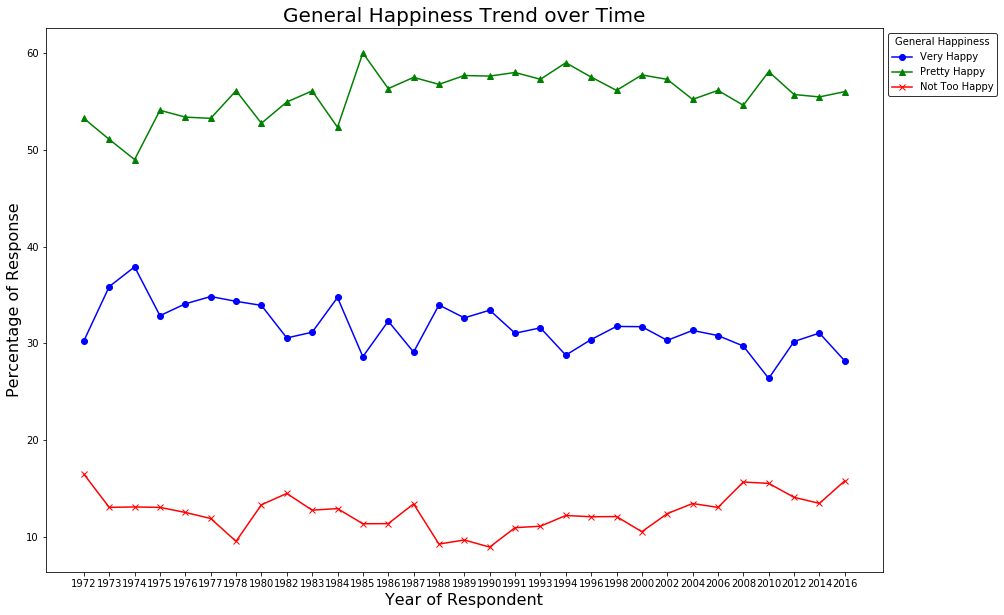

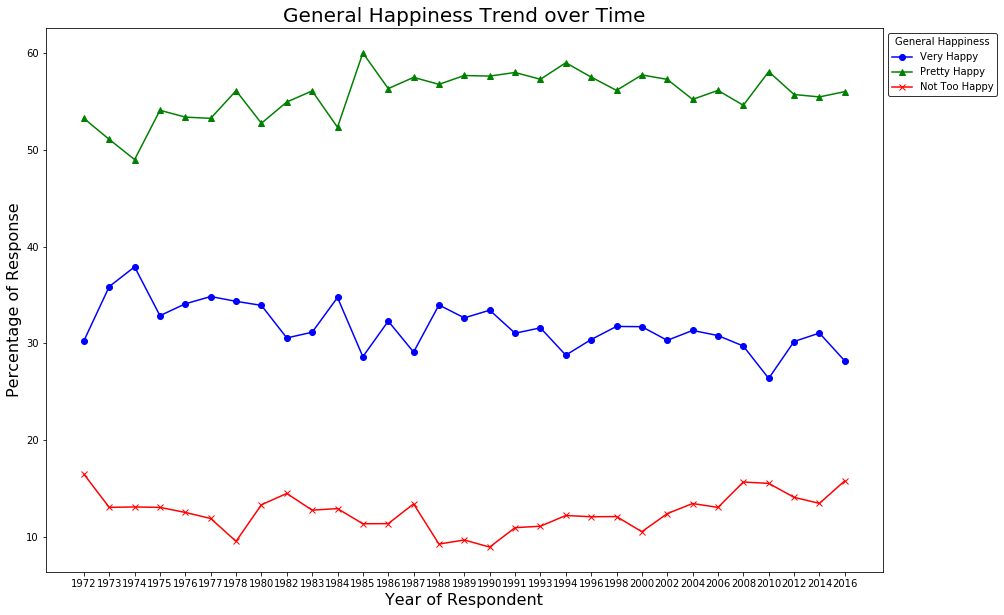

In [9]:
# Plot Data from 1972- 2016 (Happiness Measure )

x_axis=list(Happiness_Summary)
y_axis=list(Happiness_Summary.loc['Very happy'])
y_axis1=list(Happiness_Summary.loc['Pretty happy'])
y_axis2=list(Happiness_Summary.loc['Not too happy'])


fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.figure(figsize = (15,10))
plt.title('General Happiness Trend over Time',
         fontdict = {'fontsize': 20})

very_happy, = plt.plot(x_axis, y_axis, marker ='o', color='blue', label="Very Happy")
pretty_happy, = plt.plot(x_axis, y_axis1, marker='^', color='green', label="Pretty Happy")
not_too_happy, = plt.plot(x_axis, y_axis2, marker='x', color='red', label="Not Too Happy")


# plt.legend(handles=[very_happy, pretty_happy,not_too_happy], loc="best")

plt.legend(bbox_to_anchor = (1,1),
           frameon = True, 
           edgecolor = 'black', 
           facecolor = 'white',
           title = "General Happiness")


plt.xlabel('Year of Respondent',
          fontdict = {'fontsize': 16})
plt.ylabel('Percentage of Response',
          fontdict = {'fontsize': 16})

#plt.xticks(np.arange(min(1972), max(2016)+1, 1.0))


plt.show()

# General Happiness vs. Condition of health

In [10]:
gss_df.fillna("None") #Fill NaN/Null values with blank
pd.isnull(gss_df) #Detect missing values (NaN in numeric arrays, None/NaN in object arrays)

,Ballot used for interview,Specific denomination,Rs religious preference,Should marijuana be made legal,Courts dealing with criminals,Importance of gun control issue to r,Caring for the poor -- version z,Halting rising crime rate,Think of self as liberal or conservative,Vote obama or mccain,...,Was r born in this country,"Region of residence, age 16",Type of place lived in when 16 yrs old,Race of respondent,Respondents sex,Type of college respondent attended,College major 1,Mothers highest degree,Rs highest degree,Gss year for this respondent
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#creating a new dataframe with selected columns
gss_happiness_health = gss_df[["Gss year for this respondent                       ",
                               "General happiness",
                               "Condition of health"]]
gss_happiness_health_renamed = gss_happiness_health.rename(columns={'Gss year for this respondent                       ': 
                                                                    'Year'})


# gss_happiness_health_renamed.drop(["Don't Know", "Not Applicable" "No Answer"])
gss_happiness_health_renamed.head()

,Year,General happiness,Condition of health
0,2006,Pretty happy,Fair
1,2006,Very happy,Not applicable
2,2006,Pretty happy,Not applicable
3,2006,Very happy,Excellent
4,2006,Pretty happy,Good


In [62]:
#gss_happiness_grouped = gss_happiness_health_renamed.groupby(["Year", "General happiness" ,"Condition of health"]).count()
# gss_happiness_grouped.drop(["Don't Know", "Not Applicable" "No Answer"])
#gss_happiness_grouped
# gss_happiness_grouped.unstack(level=0)
gss_happiness_grouped = gss_happiness_health_renamed.groupby(["Year", "General happiness" ,"Condition of health"],as_index=False).size().unstack(fill_value=0).reset_index()


gss_happiness_grouped = gss_happiness_grouped.drop('No answer', 1)
gss_happiness_grouped = gss_happiness_grouped.drop('Not applicable', 1)
gss_happiness_grouped = gss_happiness_grouped.drop("Don't know", 1)

gss_happiness_grouped 

# Dataframe for "Pretty Happy vs Condition of Health"


gss_happiness_grouped_prettyhappy = gss_happiness_grouped .loc[gss_happiness_grouped ['General happiness'] == 'Pretty happy']



gss_happiness_grouped_prettyhappy.set_index('Year', inplace=True)


gss_happiness_grouped_prettyhappy['total']= gss_happiness_grouped_prettyhappy['Excellent']+gss_happiness_grouped_prettyhappy['Fair'] + gss_happiness_grouped_prettyhappy['Poor']+gss_happiness_grouped_prettyhappy['Good']

#gss_happiness_grouped_prettyhappy= gss_happiness_grouped_prettyhappy['Excellent']/ gss_happiness_grouped_prettyhappy['total']

gss_happiness_grouped_prettyhappy

#for idp in gss_happiness_grouped_prettyhappy.index:
    #gss_happiness_grouped_prettyhappy.loc[idp] = ((gss_happiness_grouped_prettyhappy.loc[idp]/gss_happiness_grouped_prettyhappy.loc['total']))*100


    
# Dataframe for "Very happy vs Condition of Health"


gss_happiness_grouped_veryhappy = gss_happiness_grouped .loc[gss_happiness_grouped ['General happiness'] == 'Very happy']



gss_happiness_grouped_veryhappy.set_index('Year', inplace=True)


gss_happiness_grouped_veryhappy['total']= gss_happiness_grouped_veryhappy['Excellent']+gss_happiness_grouped_veryhappy['Fair'] + gss_happiness_grouped_veryhappy['Poor']+gss_happiness_grouped_veryhappy['Good']

#gss_happiness_grouped_prettyhappy= gss_happiness_grouped_prettyhappy['Excellent']/ gss_happiness_grouped_prettyhappy['total']

gss_happiness_grouped_veryhappy

# Dataframe for "Not too Happy vs Condition of Health"


gss_happiness_grouped_nothappy = gss_happiness_grouped .loc[gss_happiness_grouped ['General happiness'] == 'Not too happy']


gss_happiness_grouped_nothappy.set_index('Year', inplace=True)


gss_happiness_grouped_nothappy['total']= gss_happiness_grouped_nothappy['Excellent']+gss_happiness_grouped_nothappy['Fair'] + gss_happiness_grouped_nothappy['Poor']+gss_happiness_grouped_nothappy['Good']

#gss_happiness_grouped_prettyhappy= gss_happiness_grouped_prettyhappy['Excellent']/ gss_happiness_grouped_prettyhappy['total']

gss_happiness_grouped_nothappy
    
    
    

/Users/pooja/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pooja/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pooja/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Condition of health,General happiness,Excellent,Fair,Good,Poor,total
Year,,,,,,
2006,Not too happy,33,92,103,36,264
2008,Not too happy,29,77,86,32,224
2010,Not too happy,33,69,79,31,212
2012,Not too happy,23,63,62,31,179
2014,Not too happy,39,79,72,52,242
2016,Not too happy,32,111,112,58,313


[2006 2008 2010 2012 2014 2016]
[22.495446265938067, 22.315202231520225, 21.428571428571427, 22.689075630252102, 20.174482006543077, 18.551587301587304]


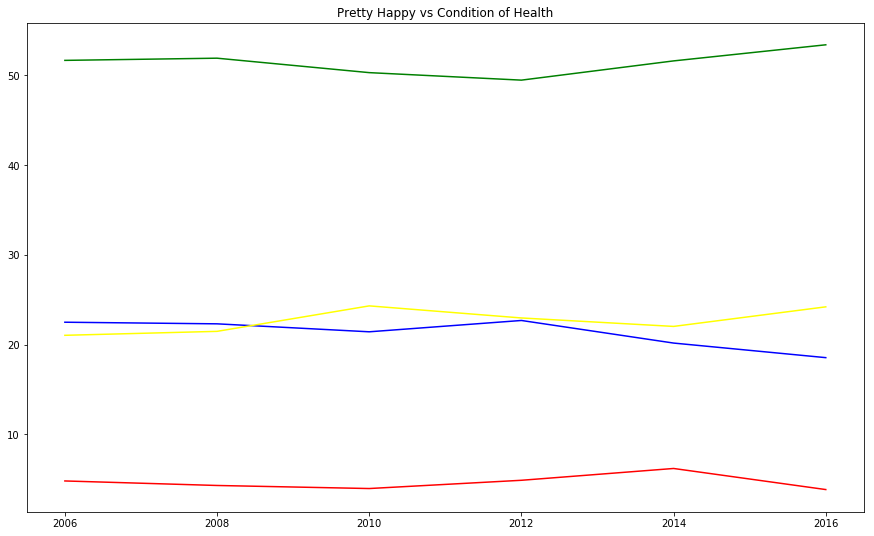

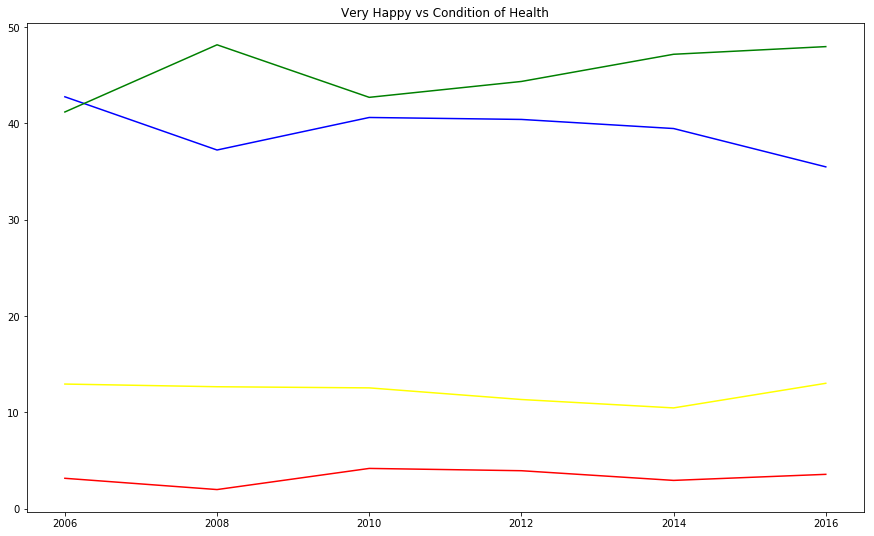

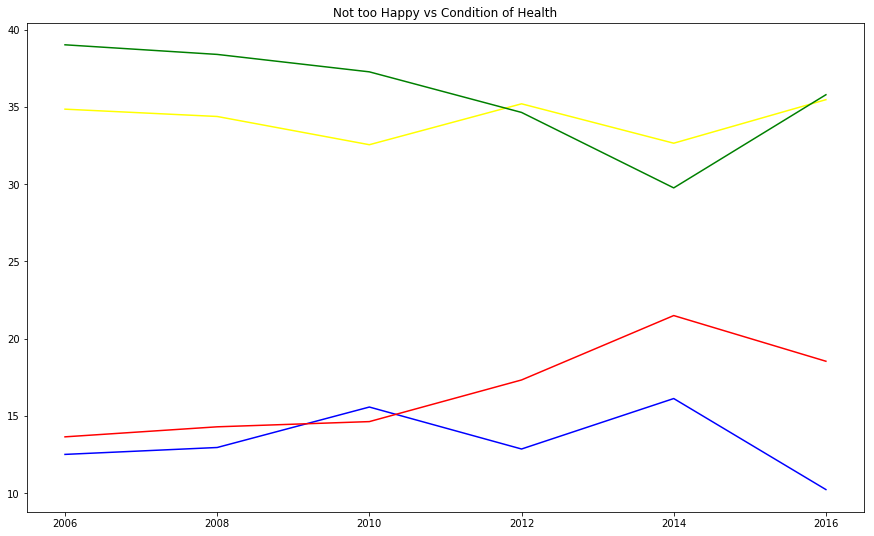

In [63]:


# Plotting happiness = pretty happy and condition of health 

x_axis1=gss_happiness_grouped_prettyhappy.index.get_values()

print(x_axis1)

y_axis_excellent= (gss_happiness_grouped_prettyhappy['Excellent']/gss_happiness_grouped_prettyhappy['total'])*100
y_axis_fair= (gss_happiness_grouped_prettyhappy['Fair']/gss_happiness_grouped_prettyhappy['total'])*100
y_axis_good= (gss_happiness_grouped_prettyhappy['Good']/gss_happiness_grouped_prettyhappy['total'])*100
y_axis_poor= (gss_happiness_grouped_prettyhappy['Poor']/gss_happiness_grouped_prettyhappy['total'])*100

y_axis_excellent=y_axis_excellent.tolist()
y_axis_fair=y_axis_fair.tolist()
y_axis_good=y_axis_good.tolist()
y_axis_poor=y_axis_poor.tolist()

print(y_axis_excellent)


excellent_health, = plt.plot(x_axis1, y_axis_excellent, color='blue', label="Excellent")
fair_health, = plt.plot(x_axis1, y_axis_fair, color='yellow', label="Fair")
good_health, = plt.plot(x_axis1, y_axis_good, color='green', label="Good")
poor_health, = plt.plot(x_axis1, y_axis_poor, color='red', label="Poor")
plt.title('Pretty Happy vs Condition of Health')

plt.show()

# Plotting happiness = very happy and condition of health 

y_axis_excellent1= (gss_happiness_grouped_veryhappy['Excellent']/gss_happiness_grouped_veryhappy['total'])*100
y_axis_fair1= (gss_happiness_grouped_veryhappy['Fair']/gss_happiness_grouped_veryhappy['total'])*100
y_axis_good1= (gss_happiness_grouped_veryhappy['Good']/gss_happiness_grouped_veryhappy['total'])*100
y_axis_poor1= (gss_happiness_grouped_veryhappy['Poor']/gss_happiness_grouped_veryhappy['total'])*100

y_axis_excellent1=y_axis_excellent1.tolist()
y_axis_fair1=y_axis_fair1.tolist()
y_axis_good1=y_axis_good1.tolist()
y_axis_poor1=y_axis_poor1.tolist()




excellent_health1, = plt.plot(x_axis1, y_axis_excellent1, color='blue', label="Excellent")
fair_health1, = plt.plot(x_axis1, y_axis_fair1, color='yellow', label="Fair")
good_health1, = plt.plot(x_axis1, y_axis_good1, color='green', label="Good")
poor_health1, = plt.plot(x_axis1, y_axis_poor1, color='red', label="Poor")
plt.title('Very Happy vs Condition of Health')

plt.show()

# Plotting happiness = not happy and condition of health 

y_axis_excellent2= (gss_happiness_grouped_nothappy['Excellent']/gss_happiness_grouped_nothappy['total'])*100
y_axis_fair2= (gss_happiness_grouped_nothappy['Fair']/gss_happiness_grouped_nothappy['total'])*100
y_axis_good2= (gss_happiness_grouped_nothappy['Good']/gss_happiness_grouped_nothappy['total'])*100
y_axis_poor2= (gss_happiness_grouped_nothappy['Poor']/gss_happiness_grouped_nothappy['total'])*100

y_axis_excellent2=y_axis_excellent2.tolist()
y_axis_fair2=y_axis_fair2.tolist()
y_axis_good2=y_axis_good2.tolist()
y_axis_poor2=y_axis_poor2.tolist()




excellent_health2, = plt.plot(x_axis1, y_axis_excellent2, color='blue', label="Excellent")
fair_health2, = plt.plot(x_axis1, y_axis_fair2, color='yellow', label="Fair")
good_health2, = plt.plot(x_axis1, y_axis_good2, color='green', label="Good")
poor_health2, = plt.plot(x_axis1, y_axis_poor2, color='red', label="Poor")
plt.title('Not too Happy vs Condition of Health')

plt.figure(figsize = (8,8))


plt.show()

 








# General Happiness vs Social Issues (Marijuana , Political Affliation, Gun Issues)

In [12]:
#creating a new dataframe with selected columns
gss_happiness_social = gss_df[["Gss year for this respondent                       ",
                               "General happiness",
                               "Should marijuana be made legal",
                               "Courts dealing with criminals",
                               "Importance of gun control issue to r",
                               "Think of self as liberal or conservative",
                               "Vote obama or mccain",
                               "Religion in which raised",
                               "Political party affiliation"]]


gss_happiness_social_renamed = gss_happiness_social.rename(columns={'Gss year for this respondent                       ': 
                                                                    'Year', 
                                                                   })
gss_happiness_social_renamed.head()

,Year,General happiness,Should marijuana be made legal,Courts dealing with criminals,Importance of gun control issue to r,Think of self as liberal or conservative,Vote obama or mccain,Religion in which raised,Political party affiliation
0,2006,Pretty happy,Not legal,Not harsh enough,Not applicable,Extremely liberal,Not applicable,Catholic,Strong democrat
1,2006,Very happy,Not legal,Too harsh,Not applicable,Slightly liberal,Not applicable,Catholic,"Ind,near rep"
2,2006,Pretty happy,Not legal,About right,Not applicable,Conservative,Not applicable,Catholic,Strong democrat
3,2006,Very happy,Not applicable,About right,Not applicable,Slightly liberal,Not applicable,Protestant,Strong democrat
4,2006,Pretty happy,Not applicable,Too harsh,Not applicable,Liberal,Not applicable,Catholic,Strong democrat
